<a href="https://colab.research.google.com/github/DommiiUdomp/Dommii/blob/main/IntroObjectDetaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries and Read image**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pathlib
import os
import tensorflow as tf

import cv2

In [2]:
img = ('/content/try.jpeg')

image_r = plt.imread(img)

# **Set Range HSV of Target**

In [3]:
#Converts image from RGB to HSV.
image_h = tf.image.rgb_to_hsv(image_r, name=None)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


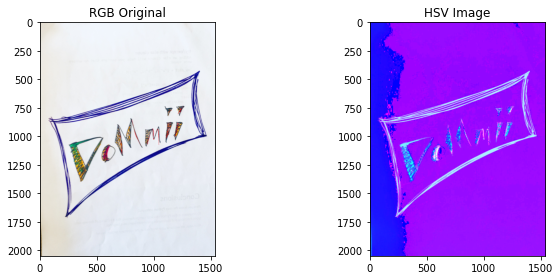

In [4]:
from scipy.sparse.construct import random
#Plot compare
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(image_r)
ax[0].set_title("RGB Original")
ax[1].imshow(image_h, cmap=plt.cm.hsv_r)
ax[1].set_title("HSV Image")

fig.tight_layout()
plt.show()

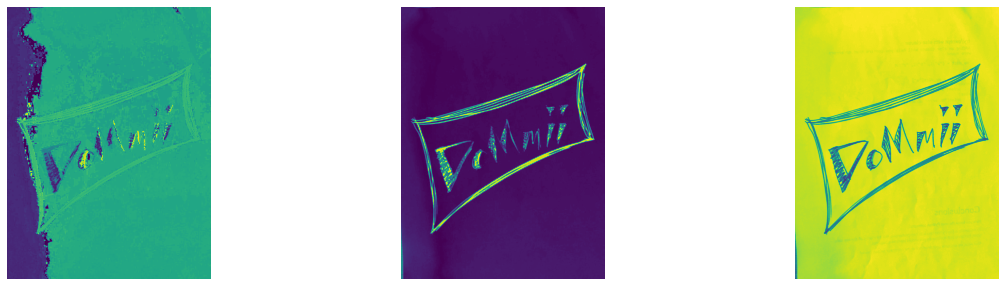

In [5]:
im_hue = image_h[:,:,0]
im_sat = image_h[:,:,1]
im_val = image_h[:,:,2]
# how to apply thershold ?

fig, ax  = plt.subplots(nrows=1,ncols=3, figsize =(20, 5))
fig.subplots_adjust(wspace=0.2)
ax[0].imshow(im_hue)
ax[0].set_axis_off()
ax[1].imshow(im_sat)
ax[1].set_axis_off()
ax[2].imshow(im_val)
ax[2].set_axis_off()

plt.show()

Hue: main color // H*255/360

Saturation: color purification // S*255/100

Value: Bright // V*255/100

In [6]:
image_h.shape

TensorShape([2048, 1536, 3])

In [8]:
# define range of blue color in HSV
lower_blue = np.array([20,180,180])
upper_blue = np.array([40,255,255])

In [9]:
im_hue_arr = np.array(im_hue)
im_sat_arr = np.array(im_sat)
im_val_arr = np.array(im_val)

In [10]:
from skimage import measure

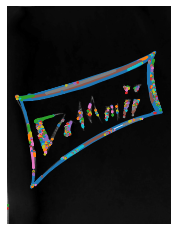

In [11]:
# Find contours at a constant value of 0.8
contours = measure.find_contours(im_sat_arr, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(im_sat_arr, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_axis_off()
plt.show()

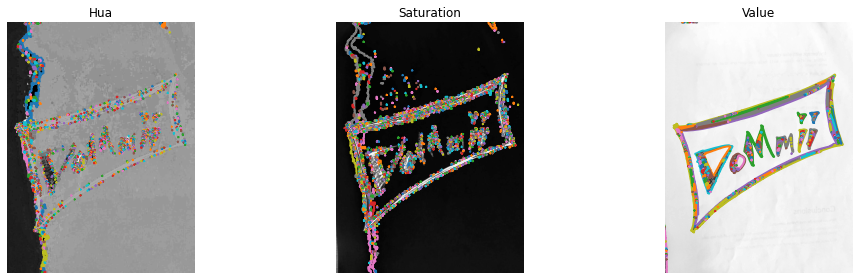

In [12]:
# Find contours at a constant value
im_hua_contours = measure.find_contours(np.array(im_hue_arr), 0.01)
im_sat_contours = measure.find_contours(np.array(im_sat_arr), 0.01)
im_val_contours = measure.find_contours(np.array(im_val_arr), 200)

# Display the image and plot all contours found
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].imshow(im_hue_arr, cmap=plt.cm.gray)
axes[1].imshow(im_sat_arr, cmap=plt.cm.gray)
axes[2].imshow(im_val_arr, cmap=plt.cm.gray)

for im_hua_contour in im_hua_contours:
    axes[0].plot(im_hua_contour[:, 1], im_hua_contour[:, 0], linewidth=2)

axes[0].axis('image')
axes[0].set_axis_off()
axes[0].set_title("Hua")

for im_sat_contour in im_sat_contours:
    axes[1].plot(im_sat_contour[:, 1], im_sat_contour[:, 0], linewidth=2)

axes[1].axis('image')
axes[1].set_axis_off()
axes[1].set_title("Saturation")

for im_val_contour in im_val_contours:
    axes[2].plot(im_val_contour[:, 1], im_val_contour[:, 0], linewidth=2)

axes[2].axis('image')
axes[2].set_axis_off()
axes[2].set_title("Value")


fig.tight_layout()
plt.show()

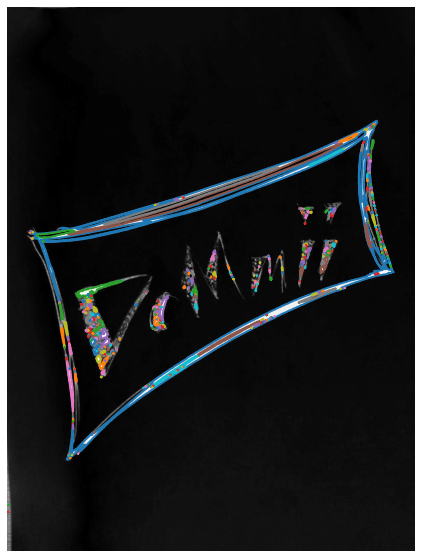

In [13]:
# Find contours at a constant value of 0.8
contours = measure.find_contours(im_sat_arr, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(im_sat_arr, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_axis_off()
plt.show()

# **Gray colour and range of thresholds**

In [14]:
#Converts image from RGB to Gray.
image_g = tf.image.rgb_to_grayscale(image_r, name=None)
image_g = np.array(image_g)
print(image_g.shape)

(2048, 1536, 1)


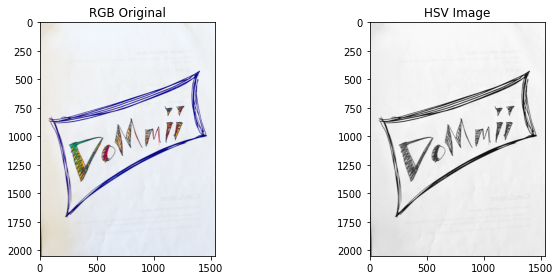

In [15]:
#Plot compare
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(image_r)
ax[0].set_title("RGB Original")
ax[1].imshow(image_g[:,:,0], cmap=plt.cm.gray)
ax[1].set_title("HSV Image")

fig.tight_layout()
plt.show()

In [16]:
image_gray = image_g[:,:,0]/image_g.max()
image_gray.max()

1.0

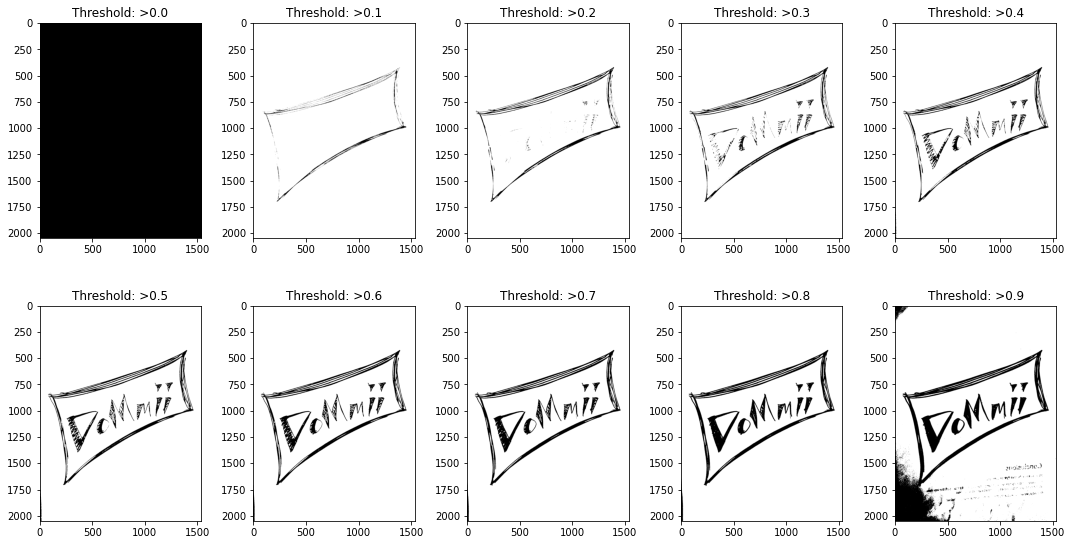

In [17]:
plt.figure(figsize=(15, 8))
 
for i in range(10):
   
  # Iterating different thresholds
  binarized_gray = (image_gray > i*0.1)*1
  plt.subplot(2,5,i+1)
   
  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))
   
  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap=plt.cm.gray)
   
plt.tight_layout()

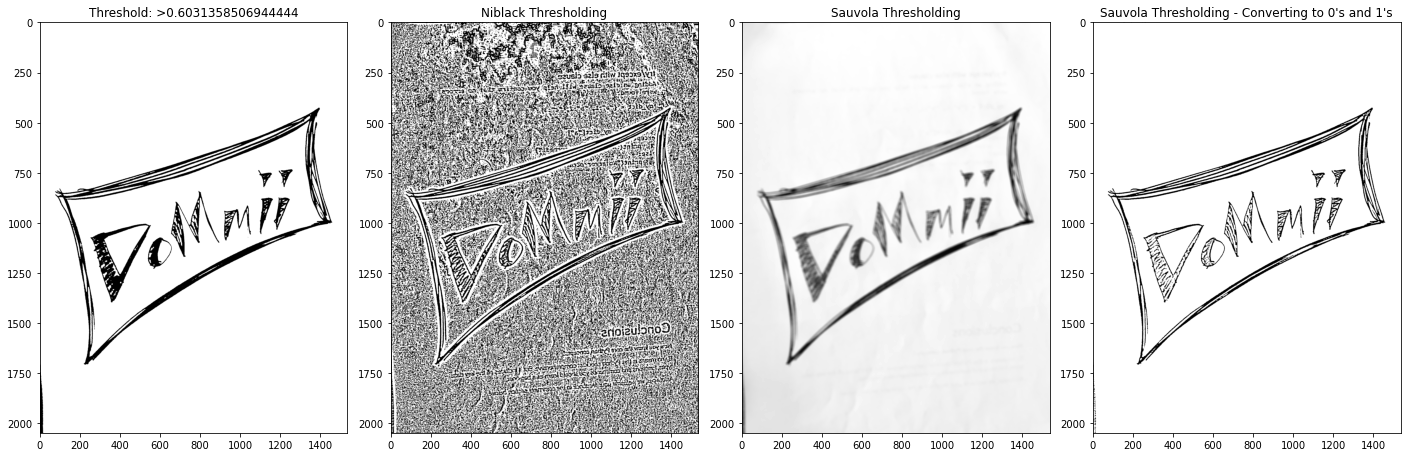

In [18]:
# Importing necessary libraries
from skimage import filters

# plot
fig, axes = plt.subplots(1, 4, figsize=(20, 12))

threshold = filters.threshold_otsu(image_gray) # Computing Otsu's thresholding value
binarized_gray = (image_gray > threshold)*1 # Computing binarized values using the obtained # threshold
axes[0].set_title("Threshold: >"+str(threshold))
axes[0].imshow(binarized_gray, cmap=plt.cm.gray)

threshold = filters.threshold_niblack(image_gray) #Computing Ni black's local pixel #threshold values for every pixel
binarized_gray = (image_gray > threshold)*1 # Computing binarized values using the obtained # threshold
axes[1].set_title("Niblack Thresholding")
axes[1].imshow(binarized_gray, cmap=plt.cm.gray)

threshold = filters.threshold_sauvola(image_gray) # Computing Sauvola's local pixel threshold # values for every pixel - Not Binarized
axes[2].set_title("Sauvola Thresholding")
axes[2].imshow(threshold, cmap=plt.cm.gray)

binarized_gray = (image_gray > threshold)*1 # Computing Sauvola's local pixel # threshold values for every pixel - Binarized
axes[3].set_title("Sauvola Thresholding - Converting to 0's and 1's")
axes[3].imshow(binarized_gray, cmap=plt.cm.gray)

fig.tight_layout()
plt.show()

In [19]:
# Importing necessary libraries
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# Applying Gaussian Filter to remove noise
image_gray_noiseless = gaussian(image_gray, sigma=1, mode='reflect')

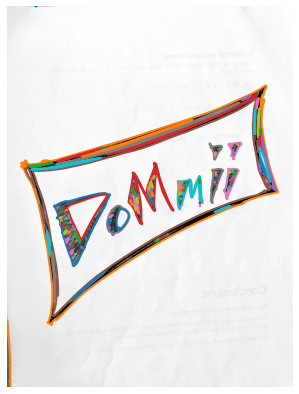

In [20]:
# Find contours at a constant value
contours = measure.find_contours(image_gray_noiseless, 0.7)

# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(10,7))
ax.imshow(image_gray_noiseless, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_axis_off()
plt.show()

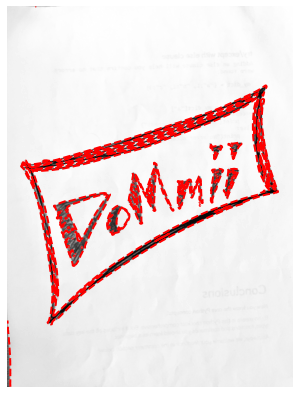

In [21]:
# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(10,7))
ax.imshow(image_gray_noiseless, cmap=plt.cm.gray)

# Computing the Active Contour for the given image
contours = measure.find_contours(image_gray_noiseless, 0.7)
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], '--r', linewidth=2)

ax.axis('image')
ax.set_axis_off()
plt.show()